In [3]:

#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
# get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier



In [4]:

#reading the dataset
dataset = pd.read_csv("dataset/maindataset.csv", index_col=0)

dataset.head()




,Database,C++,Analytical Skills,Python,C,Java,Csharp,R,Statistics,CSS,...,Php,Javascript,Algorithm,Cyber Security,OS,Psyocology,SQL,Communication Skill,Software Testing,TARGET CLASS
1,7,1,8,10,1,1,3,2,7,0,...,0,0,9,0,0,6,8,5,5,Artificial intelligence
2,7,2,8,9,2,2,0,6,6,0,...,0,0,9,0,0,6,8,5,6,Artificial intelligence
3,7,3,8,9,3,9,2,9,10,0,...,0,0,9,0,0,6,8,5,7,Artificial intelligence
4,8,0,6,7,0,2,0,8,10,0,...,0,1,9,3,5,1,7,6,7,data science and analytics
5,8,1,7,8,1,4,1,7,9,0,...,0,2,9,2,3,1,7,6,7,data science and analytics


In [5]:
# target classes to be recommended

list(dataset.columns)


['Database',
 'C++',
 'Analytical Skills',
 'Python',
 'C',
 'Java',
 'Csharp',
 'R',
 'Statistics',
 'CSS',
 'Html',
 'Php',
 'Javascript',
 'Algorithm',
 'Cyber Security',
 'OS',
 'Psyocology',
 'SQL',
 'Communication Skill',
 'Software Testing',
 'TARGET CLASS']

In [6]:

# division of dataset into features and target class

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [7]:
# divide dataset into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


[[5 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 4 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6]]
                                      precision    recall  f1-score   support

             Artificial intelligence       0.83      0.83      0.83         6
     applied research and innovation       1.00      1.00      1.00         8
                     cloud computing       1.00      1.00     

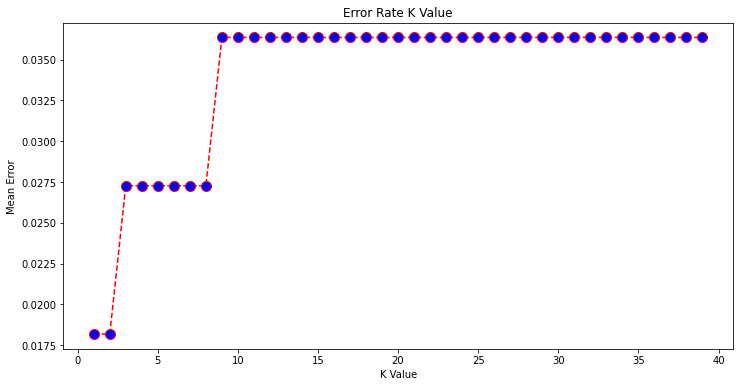

In [8]:
# apply knn algorithm

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

#predict for x_test
y_pred = classifier.predict(X_test)

#print confusion matrix and accuracy parameters for knn
classifier.score(X,y)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calculating error for K values between 1 and 40
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


# In[13]:


#predict for random values
x_random = [[7,3,8,9,3,9,2,9,10,1,1,1,1,9,1,1,1,8,5,7],[10,0,9,9,0,0,0,9,9,0,0,0,0,0,0,0,0,0,0,0]]
y_random=(classifier.predict(x_random))
print(y_random)


In [12]:

# apply stochastic gradient Descent

classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
classifier.fit(X_train, y_train)
SGDClassifier(max_iter=5)
y_pred= classifier.predict(X_test)
#print confusion matrix and accuracy parameters for knn
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#predict for random values
x_random = [[7,3,8,9,3,9,2,9,10,1,1,1,1,9,1,1,1,8,5,7],[0,0,0,0,0,0,0,9,8,5,7,0,5,9,8,0,9,8,9,9]]
y_random=(classifier.predict(x_random))
print(y_random)


[[6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 7 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6]]
                                      precision    recall  f1-score   support

             Artificial intelligence       0.67      1.00      0.80         6
     applied research and innovation       1.00      1.00      1.00         8
                     cloud computing       1.00      1.00     

f:\project\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [14]:
# apply Logistic regression

classifier=LogisticRegression()
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

#print confusion matrix and accuracy parameters for knn
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#predict for random values
x_random = [[7,3,8,9,3,9,2,9,10,1,1,1,1,9,1,1,1,8,5,7],[0,0,0,0,0,0,0,9,8,5,7,0,5,9,8,0,9,8,9,9]]
y_random=(classifier.predict(x_random))
print(y_random)


[[6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6]]
                                      precision    recall  f1-score   support

             Artificial intelligence       0.86      1.00      0.92         6
     applied research and innovation       1.00      1.00      1.00         8
                     cloud computing       1.00      1.00     

f:\project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# apply naive bayes algorithm 
classifier = GaussianNB()
classifier.fit(X_train, y_train)

#predict for x_test
y_pred = classifier.predict(X_test)

#print confusion matrix and accuracy parameters for knn
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

x_random = [[7,3,8,9,3,9,2,9,10,1,1,1,1,9,1,1,1,8,5,7],[0,0,0,0,0,0,0,9,8,5,7,0,5,9,8,0,9,8,9,9]]
y_random=(classifier.predict(x_random))
print(y_random)


[[6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6]]
                                      precision    recall  f1-score   support

             Artificial intelligence       0.75      1.00      0.86         6
     applied research and innovation       1.00      1.00      1.00         8
                     cloud computing       1.00      0.50     

In [16]:
# decision tree classification
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

#print confusion matrix and accuracy parameters for knn
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

x_random = [[7,3,8,9,3,9,2,9,10,1,1,1,1,9,1,1,1,8,5,7],[8,3,9,9,3,6,1,8,8,3,3,3,3,9,3,5,1,7,6,7]]
y_random=(classifier.predict(x_random))
print(y_random)


[[5 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 7 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 2 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 6 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6]]
                                      precision    recall  f1-score   support

             Artificial intelligence       0.71      0.83      0.77         6
     applied research and innovation       0.70      0.88      0.78         8
                     cloud computing       1.00      1.00     

In [17]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X, y)
RandomForestClassifier(max_depth=2, random_state=0)
print(classifier.feature_importances_)

#print confusion matrix and accuracy parameters for knn
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

x_random = [[7,3,8,9,3,9,2,9,10,1,1,1,1,9,1,1,1,8,5,7],[0,0,0,0,0,0,0,9,8,5,7,0,5,9,8,0,9,8,9,9]]
y_random=(classifier.predict(x_random))
print(y_random)


[0.01434401 0.00545966 0.04344168 0.04844904 0.03990284 0.00375745
 0.02947325 0.03877635 0.05516132 0.0463891  0.02572943 0.08079038
 0.04498963 0.03397182 0.03887784 0.06184784 0.07753556 0.06096385
 0.09664263 0.15349634]
[[5 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 7 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 2 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 6 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6]]
                                      precision    recall  f1-score   su